## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [ ]:
import requests
response = requests.request("GET", "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", headers={"Metadata-Flavor":"Google"})
token = response.text

# add the next line to run in each iteration of your main training loop
# requests.request("POST", "https://nebula.udacity.com/api/v1/remote/keep-alive", headers={'Authorization': "STAR " + token})
requests.request("POST", "https://nebula.udacity.com/api/v1/remote/keep-alive", headers={'Authorization': "STAR " + token})

In [3]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
## TODO: Once you've defined the network, you can instantiate it
# one example conv layer has been provided for you
from models import AlexNet

net = AlexNet()
print(net)

C:\Users\Jamal Ali\OneDrive - Komate Industrial Company\Abdullah Office\Udacity\Computer Vision\Projects\P1_Facial_Keypoints-master\P1_Facial_Keypoints-master\models.py:138: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  m.weight = nn.init.xavier_uniform(m.weight, gain=1)
C:\Users\Jamal Ali\OneDrive - Komate Industrial Company\Abdullah Office\Udacity\Computer Vision\Projects\P1_Facial_Keypoints-master\P1_Facial_Keypoints-master\models.py:141: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  m.weight = nn.init.xavier_uniform(m.weight, gain=1)


AlexNet(
  (conv1): Conv2d(1, 96, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=136, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (dropout4): Dropout(p=0.4, inplace=False)
  (dropout6): Dropout(p=0.6, inplace=False)
  (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(384, eps

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [13]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
train_data_transform = transforms.Compose([Rescale((250, 250)), \
                                           RandomCrop((227, 227)), \
                                           Normalize(), \
                                           ToTensor()])

test_data_transform = transforms.Compose([Rescale((227, 227)), \
                                          Normalize(), \
                                          ToTensor()])

# testing that you've defined a transform
assert(train_data_transform is not None), 'Define a data_transform'

In [15]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=train_data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 227, 227]) torch.Size([68, 2])
1 torch.Size([1, 227, 227]) torch.Size([68, 2])
2 torch.Size([1, 227, 227]) torch.Size([68, 2])
3 torch.Size([1, 227, 227]) torch.Size([68, 2])


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [16]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [17]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',
                                             root_dir='data/test/',
                                             transform=test_data_transform)



In [18]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Make sure the image is a FloatTensor, which the model expects.
3. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [22]:
# test the model on a batch of test images

def net_sample_output():
    net.eval()
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']
        
        images = Variable(images, volatile=True)
        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [23]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

C:\Users\Jamal Ali\AppData\Local\Temp\ipykernel_9180\858808927.py:12: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  images = Variable(images, volatile=True)


torch.Size([10, 1, 227, 227])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [24]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

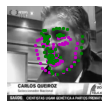

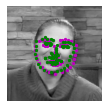

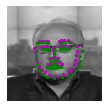

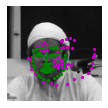

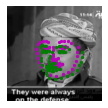

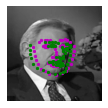

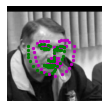

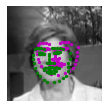

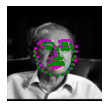

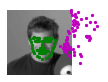

In [54]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
#         predicted_key_pts = (predicted_key_pts * 48.0) + 48
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](https://pytorch.org/docs/master/nn.html#loss-functions).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [26]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.SmoothL1Loss()

optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [28]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)
            
            # wrap them in a torch Variable
            images, key_pts = Variable(images), Variable(key_pts)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net.forward(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to the running_loss, use .item()
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/1000))
                running_loss = 0.0

    print('Finished Training')


In [42]:
# train your network
n_epochs = 50 # start small, and increase when you've decided on your model structure and hyperparams

train_net(n_epochs)

Epoch: 1, Batch: 10, Avg. Loss: 0.0007048236802220344
Epoch: 1, Batch: 20, Avg. Loss: 0.0006232138387858867
Epoch: 1, Batch: 30, Avg. Loss: 0.0006379834190011024
Epoch: 1, Batch: 40, Avg. Loss: 0.0006725201159715653
Epoch: 1, Batch: 50, Avg. Loss: 0.0006035439036786557
Epoch: 1, Batch: 60, Avg. Loss: 0.0006719143874943256
Epoch: 1, Batch: 70, Avg. Loss: 0.0007016667984426022
Epoch: 1, Batch: 80, Avg. Loss: 0.00067376659065485
Epoch: 1, Batch: 90, Avg. Loss: 0.0007565867751836776
Epoch: 1, Batch: 100, Avg. Loss: 0.0007514075227081776
Epoch: 1, Batch: 110, Avg. Loss: 0.0007044424824416638
Epoch: 1, Batch: 120, Avg. Loss: 0.0006598725430667401
Epoch: 1, Batch: 130, Avg. Loss: 0.0006492992974817753
Epoch: 1, Batch: 140, Avg. Loss: 0.0006242291070520878
Epoch: 1, Batch: 150, Avg. Loss: 0.0006022674031555652
Epoch: 1, Batch: 160, Avg. Loss: 0.0006641423068940639
Epoch: 1, Batch: 170, Avg. Loss: 0.0005985536538064479
Epoch: 1, Batch: 180, Avg. Loss: 0.0006028040237724781
Epoch: 1, Batch: 190,

Epoch: 5, Batch: 150, Avg. Loss: 0.0004481709469109774
Epoch: 5, Batch: 160, Avg. Loss: 0.0004138062745332718
Epoch: 5, Batch: 170, Avg. Loss: 0.0004874610938131809
Epoch: 5, Batch: 180, Avg. Loss: 0.0005001094099134207
Epoch: 5, Batch: 190, Avg. Loss: 0.000515452016144991
Epoch: 5, Batch: 200, Avg. Loss: 0.0004724848959594965
Epoch: 5, Batch: 210, Avg. Loss: 0.0005206176452338695
Epoch: 5, Batch: 220, Avg. Loss: 0.00048667835630476476
Epoch: 5, Batch: 230, Avg. Loss: 0.0005351789779961109
Epoch: 5, Batch: 240, Avg. Loss: 0.0005276858434081077
Epoch: 5, Batch: 250, Avg. Loss: 0.0004917248953133822
Epoch: 5, Batch: 260, Avg. Loss: 0.0004585306029766798
Epoch: 5, Batch: 270, Avg. Loss: 0.00044499131850898264
Epoch: 5, Batch: 280, Avg. Loss: 0.0005446036793291569
Epoch: 5, Batch: 290, Avg. Loss: 0.0005657740198075771
Epoch: 5, Batch: 300, Avg. Loss: 0.0005863884724676609
Epoch: 5, Batch: 310, Avg. Loss: 0.0006218929737806321
Epoch: 5, Batch: 320, Avg. Loss: 0.0005074411556124687
Epoch: 5,

Epoch: 9, Batch: 280, Avg. Loss: 0.00045715828612446786
Epoch: 9, Batch: 290, Avg. Loss: 0.00045906818099319935
Epoch: 9, Batch: 300, Avg. Loss: 0.0004523442722856998
Epoch: 9, Batch: 310, Avg. Loss: 0.00039619969576597215
Epoch: 9, Batch: 320, Avg. Loss: 0.00044014049135148527
Epoch: 9, Batch: 330, Avg. Loss: 0.00037017067335546016
Epoch: 9, Batch: 340, Avg. Loss: 0.00045791155472397804
Epoch: 10, Batch: 10, Avg. Loss: 0.0004573167469352484
Epoch: 10, Batch: 20, Avg. Loss: 0.00040993108414113524
Epoch: 10, Batch: 30, Avg. Loss: 0.00046870977990329265
Epoch: 10, Batch: 40, Avg. Loss: 0.0005155553240329027
Epoch: 10, Batch: 50, Avg. Loss: 0.0004907603003084659
Epoch: 10, Batch: 60, Avg. Loss: 0.00042985877208411694
Epoch: 10, Batch: 70, Avg. Loss: 0.0004659442491829395
Epoch: 10, Batch: 80, Avg. Loss: 0.0004179730098694563
Epoch: 10, Batch: 90, Avg. Loss: 0.0003961603585630655
Epoch: 10, Batch: 100, Avg. Loss: 0.0003738687075674534
Epoch: 10, Batch: 110, Avg. Loss: 0.000371199069544673


Epoch: 14, Batch: 50, Avg. Loss: 0.00042138428427278995
Epoch: 14, Batch: 60, Avg. Loss: 0.00047761492244899274
Epoch: 14, Batch: 70, Avg. Loss: 0.00035194266587495804
Epoch: 14, Batch: 80, Avg. Loss: 0.00028311115596443414
Epoch: 14, Batch: 90, Avg. Loss: 0.00039902627281844614
Epoch: 14, Batch: 100, Avg. Loss: 0.0003969264719635248
Epoch: 14, Batch: 110, Avg. Loss: 0.000326497096568346
Epoch: 14, Batch: 120, Avg. Loss: 0.00034433252923190595
Epoch: 14, Batch: 130, Avg. Loss: 0.00038079111091792584
Epoch: 14, Batch: 140, Avg. Loss: 0.0004130239188671112
Epoch: 14, Batch: 150, Avg. Loss: 0.00037340345047414303
Epoch: 14, Batch: 160, Avg. Loss: 0.00030589422024786473
Epoch: 14, Batch: 170, Avg. Loss: 0.00034922292456030847
Epoch: 14, Batch: 180, Avg. Loss: 0.0003290216960012913
Epoch: 14, Batch: 190, Avg. Loss: 0.0003608687222003937
Epoch: 14, Batch: 200, Avg. Loss: 0.00040581564232707024
Epoch: 14, Batch: 210, Avg. Loss: 0.00044375811330974103
Epoch: 14, Batch: 220, Avg. Loss: 0.000408

Epoch: 18, Batch: 150, Avg. Loss: 0.000296616954728961
Epoch: 18, Batch: 160, Avg. Loss: 0.000290292190387845
Epoch: 18, Batch: 170, Avg. Loss: 0.0002771850349381566
Epoch: 18, Batch: 180, Avg. Loss: 0.00028678729571402075
Epoch: 18, Batch: 190, Avg. Loss: 0.00031034183874726294
Epoch: 18, Batch: 200, Avg. Loss: 0.0002341846264898777
Epoch: 18, Batch: 210, Avg. Loss: 0.0002728057987987995
Epoch: 18, Batch: 220, Avg. Loss: 0.0003301628679037094
Epoch: 18, Batch: 230, Avg. Loss: 0.0002746313940733671
Epoch: 18, Batch: 240, Avg. Loss: 0.0002511304132640362
Epoch: 18, Batch: 250, Avg. Loss: 0.00033386283926665783
Epoch: 18, Batch: 260, Avg. Loss: 0.00029063078761100766
Epoch: 18, Batch: 270, Avg. Loss: 0.0002538436632603407
Epoch: 18, Batch: 280, Avg. Loss: 0.00026246823742985726
Epoch: 18, Batch: 290, Avg. Loss: 0.00025519307889044287
Epoch: 18, Batch: 300, Avg. Loss: 0.00027493305876851083
Epoch: 18, Batch: 310, Avg. Loss: 0.0003345398399978876
Epoch: 18, Batch: 320, Avg. Loss: 0.0002706

Epoch: 22, Batch: 250, Avg. Loss: 0.0002426371453329921
Epoch: 22, Batch: 260, Avg. Loss: 0.00022900143824517726
Epoch: 22, Batch: 270, Avg. Loss: 0.00023304309975355863
Epoch: 22, Batch: 280, Avg. Loss: 0.00021772141475230456
Epoch: 22, Batch: 290, Avg. Loss: 0.000299907049164176
Epoch: 22, Batch: 300, Avg. Loss: 0.0002527640126645565
Epoch: 22, Batch: 310, Avg. Loss: 0.00018865156266838313
Epoch: 22, Batch: 320, Avg. Loss: 0.0002599843982607126
Epoch: 22, Batch: 330, Avg. Loss: 0.00020649435091763736
Epoch: 22, Batch: 340, Avg. Loss: 0.00020924265868961812
Epoch: 23, Batch: 10, Avg. Loss: 0.00020112342573702335
Epoch: 23, Batch: 20, Avg. Loss: 0.00021653516869992018
Epoch: 23, Batch: 30, Avg. Loss: 0.00022602555714547635
Epoch: 23, Batch: 40, Avg. Loss: 0.00017689124122262001
Epoch: 23, Batch: 50, Avg. Loss: 0.00026667380519211295
Epoch: 23, Batch: 60, Avg. Loss: 0.00024299758300185204
Epoch: 23, Batch: 70, Avg. Loss: 0.00023923760931938886
Epoch: 23, Batch: 80, Avg. Loss: 0.00021064

Epoch: 27, Batch: 10, Avg. Loss: 0.0001750238942913711
Epoch: 27, Batch: 20, Avg. Loss: 0.00015737556479871273
Epoch: 27, Batch: 30, Avg. Loss: 0.00019845631625503302
Epoch: 27, Batch: 40, Avg. Loss: 0.00015621361508965493
Epoch: 27, Batch: 50, Avg. Loss: 0.00019640853628516197
Epoch: 27, Batch: 60, Avg. Loss: 0.00017390650045126676
Epoch: 27, Batch: 70, Avg. Loss: 0.00017269567586481572
Epoch: 27, Batch: 80, Avg. Loss: 0.00015512221492826938
Epoch: 27, Batch: 90, Avg. Loss: 0.0001763194464147091
Epoch: 27, Batch: 100, Avg. Loss: 0.000171531205996871
Epoch: 27, Batch: 110, Avg. Loss: 0.00021085846517235042
Epoch: 27, Batch: 120, Avg. Loss: 0.0002199997026473284
Epoch: 27, Batch: 130, Avg. Loss: 0.0001803687121719122
Epoch: 27, Batch: 140, Avg. Loss: 0.00016584737133234738
Epoch: 27, Batch: 150, Avg. Loss: 0.00017171477898955345
Epoch: 27, Batch: 160, Avg. Loss: 0.0001991563383489847
Epoch: 27, Batch: 170, Avg. Loss: 0.00018495525326579808
Epoch: 27, Batch: 180, Avg. Loss: 0.00019550207

Epoch: 31, Batch: 110, Avg. Loss: 0.0001643348801881075
Epoch: 31, Batch: 120, Avg. Loss: 0.00014982397947460412
Epoch: 31, Batch: 130, Avg. Loss: 0.0001585488859564066
Epoch: 31, Batch: 140, Avg. Loss: 0.00018425598274916411
Epoch: 31, Batch: 150, Avg. Loss: 0.00018321803398430348
Epoch: 31, Batch: 160, Avg. Loss: 0.00015722857415676118
Epoch: 31, Batch: 170, Avg. Loss: 0.00017458252236247064
Epoch: 31, Batch: 180, Avg. Loss: 0.00016926756827160717
Epoch: 31, Batch: 190, Avg. Loss: 0.00016733712051063775
Epoch: 31, Batch: 200, Avg. Loss: 0.00018703745910897851
Epoch: 31, Batch: 210, Avg. Loss: 0.0001804209863767028
Epoch: 31, Batch: 220, Avg. Loss: 0.00016035686433315277
Epoch: 31, Batch: 230, Avg. Loss: 0.00019046919234097005
Epoch: 31, Batch: 240, Avg. Loss: 0.00021816771198064088
Epoch: 31, Batch: 250, Avg. Loss: 0.00015279260370880366
Epoch: 31, Batch: 260, Avg. Loss: 0.00021045550052076577
Epoch: 31, Batch: 270, Avg. Loss: 0.00017945783864706754
Epoch: 31, Batch: 280, Avg. Loss: 

Epoch: 35, Batch: 200, Avg. Loss: 0.00013696183450520038
Epoch: 35, Batch: 210, Avg. Loss: 0.0001322167683392763
Epoch: 35, Batch: 220, Avg. Loss: 0.0001382884755730629
Epoch: 35, Batch: 230, Avg. Loss: 0.00017488212417811154
Epoch: 35, Batch: 240, Avg. Loss: 0.00014523514034226536
Epoch: 35, Batch: 250, Avg. Loss: 0.00013675334211438894
Epoch: 35, Batch: 260, Avg. Loss: 0.0001680621625855565
Epoch: 35, Batch: 270, Avg. Loss: 0.0001646567052230239
Epoch: 35, Batch: 280, Avg. Loss: 0.00016037803422659636
Epoch: 35, Batch: 290, Avg. Loss: 0.00011151650454849005
Epoch: 35, Batch: 300, Avg. Loss: 0.00016579308360815048
Epoch: 35, Batch: 310, Avg. Loss: 0.00014243764337152243
Epoch: 35, Batch: 320, Avg. Loss: 0.00014530730247497558
Epoch: 35, Batch: 330, Avg. Loss: 0.00016663068998605012
Epoch: 35, Batch: 340, Avg. Loss: 0.00013297632662579418
Epoch: 36, Batch: 10, Avg. Loss: 0.00016214806539937855
Epoch: 36, Batch: 20, Avg. Loss: 0.0001435183621942997
Epoch: 36, Batch: 30, Avg. Loss: 0.000

Epoch: 39, Batch: 300, Avg. Loss: 0.00013555719051510095
Epoch: 39, Batch: 310, Avg. Loss: 0.0001492319987155497
Epoch: 39, Batch: 320, Avg. Loss: 0.0001431231708265841
Epoch: 39, Batch: 330, Avg. Loss: 0.00019355466589331626
Epoch: 39, Batch: 340, Avg. Loss: 0.0001195574551820755
Epoch: 40, Batch: 10, Avg. Loss: 0.00019454330857843162
Epoch: 40, Batch: 20, Avg. Loss: 0.00012246898747980594
Epoch: 40, Batch: 30, Avg. Loss: 0.00014234439097344874
Epoch: 40, Batch: 40, Avg. Loss: 0.00017454681964591145
Epoch: 40, Batch: 50, Avg. Loss: 0.00017633609287440776
Epoch: 40, Batch: 60, Avg. Loss: 0.00014763643406331538
Epoch: 40, Batch: 70, Avg. Loss: 0.000135431251488626
Epoch: 40, Batch: 80, Avg. Loss: 0.00016717634163796903
Epoch: 40, Batch: 90, Avg. Loss: 0.00013371049286797643
Epoch: 40, Batch: 100, Avg. Loss: 0.00013951437314972282
Epoch: 40, Batch: 110, Avg. Loss: 0.00014153550658375024
Epoch: 40, Batch: 120, Avg. Loss: 0.00014424906205385922
Epoch: 40, Batch: 130, Avg. Loss: 0.000141199

Epoch: 44, Batch: 60, Avg. Loss: 0.00011205815570428968
Epoch: 44, Batch: 70, Avg. Loss: 0.00012000175891444087
Epoch: 44, Batch: 80, Avg. Loss: 0.0001161836115643382
Epoch: 44, Batch: 90, Avg. Loss: 0.00010134031996130943
Epoch: 44, Batch: 100, Avg. Loss: 0.0001325732208788395
Epoch: 44, Batch: 110, Avg. Loss: 0.00016209513181820513
Epoch: 44, Batch: 120, Avg. Loss: 0.00014423118904232979
Epoch: 44, Batch: 130, Avg. Loss: 0.0001364365853369236
Epoch: 44, Batch: 140, Avg. Loss: 9.952246211469173e-05
Epoch: 44, Batch: 150, Avg. Loss: 0.0001595451133325696
Epoch: 44, Batch: 160, Avg. Loss: 0.00010097627574577928
Epoch: 44, Batch: 170, Avg. Loss: 0.0001319689182564616
Epoch: 44, Batch: 180, Avg. Loss: 0.00011273037362843751
Epoch: 44, Batch: 190, Avg. Loss: 0.00010880330950021744
Epoch: 44, Batch: 200, Avg. Loss: 0.00014331395644694568
Epoch: 44, Batch: 210, Avg. Loss: 0.00011417208053171635
Epoch: 44, Batch: 220, Avg. Loss: 0.0001372454985976219
Epoch: 44, Batch: 230, Avg. Loss: 0.000125

Epoch: 48, Batch: 160, Avg. Loss: 0.00011206592340022326
Epoch: 48, Batch: 170, Avg. Loss: 0.00015512537444010378
Epoch: 48, Batch: 180, Avg. Loss: 0.0001260169604793191
Epoch: 48, Batch: 190, Avg. Loss: 0.00014744262723252177
Epoch: 48, Batch: 200, Avg. Loss: 0.00011098339268937707
Epoch: 48, Batch: 210, Avg. Loss: 0.00016207415284588933
Epoch: 48, Batch: 220, Avg. Loss: 0.00013773584458976983
Epoch: 48, Batch: 230, Avg. Loss: 0.00015587859973311425
Epoch: 48, Batch: 240, Avg. Loss: 0.0001277239741757512
Epoch: 48, Batch: 250, Avg. Loss: 0.00014217943791300058
Epoch: 48, Batch: 260, Avg. Loss: 0.00014760130969807504
Epoch: 48, Batch: 270, Avg. Loss: 0.00015711369272321463
Epoch: 48, Batch: 280, Avg. Loss: 0.00014198569487780332
Epoch: 48, Batch: 290, Avg. Loss: 0.00010228270152583718
Epoch: 48, Batch: 300, Avg. Loss: 0.00010234014224261046
Epoch: 48, Batch: 310, Avg. Loss: 0.0001259191893041134
Epoch: 48, Batch: 320, Avg. Loss: 0.00011343824863433839
Epoch: 48, Batch: 330, Avg. Loss: 

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [43]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

C:\Users\Jamal Ali\AppData\Local\Temp\ipykernel_9180\858808927.py:12: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  images = Variable(images, volatile=True)


torch.Size([10, 1, 227, 227])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


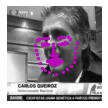

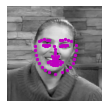

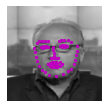

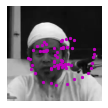

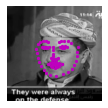

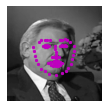

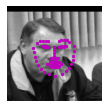

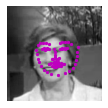

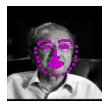

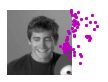

In [55]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

# visualize_output(test_images, test_outputs, gt_pts)
visualize_output(test_images, test_outputs, gt_pts=None)

Once you've found a good model (or two), save your model so you can load it and use it later!

In [58]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_3.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), 'saved_models/keypoints_model_3.pt')

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: 

Optimization: I used Adam (Adaptive momentum estimation, 2015) with learning rate of 0.001, B1 (1st moment) of 0.9, B2(2nd moment) of 0.999 and e of 1e-08.

Loss: The outputs we are looking for are the coordinated (x, y) of the 68 keypoints of a face, coordinates are continuous values and therefore we have a regression problem.

The Mean Squared error is a great loss function as it penalize more big errors. I first used that but noticed that the loss was excessively too high at some times
To address the high loss, I opted for the `SmoothL1Loss` which is also known as the Huber Loss, it creates a criterion that uses a squared term if the absolute element-wise error falls below 1 and an L1 term otherwise. It is less sensitive to outliers than the `MSELoss` and in some cases prevents exploding gradients



### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I used Naimish architecture from the paper Facial Key Points Detection using Deep Convolutional Neural Network, 2017. The only I changed was the last 2 dense layers as I did not understand why making 1000 nodes to 1000 nodes was particularly interesting and the output is 136 values in this problem.

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: 
I start by number of epochs 1 for test the code and the result then chnage the number to 50 as it seemed to give accurate result at this point
For the batch size i chose 10 is enough as for each epoch we iterate over the data 320 times to update the gradient


## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[-0.4590011  -0.6305747  -0.6250613  -0.5275422 ]
 [-0.81069255 -0.8784918  -0.8706564  -0.74985   ]
 [-0.88615113 -1.0802975  -1.0076629  -0.8963761 ]
 [-0.9263549  -0.92415875 -0.93438524 -0.8103671 ]]
(4, 4)


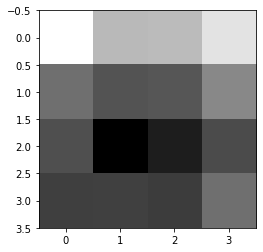

In [46]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in its convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

[[-0.4590011  -0.6305747  -0.6250613  -0.5275422 ]
 [-0.81069255 -0.8784918  -0.8706564  -0.74985   ]
 [-0.88615113 -1.0802975  -1.0076629  -0.8963761 ]
 [-0.9263549  -0.92415875 -0.93438524 -0.8103671 ]]
(4, 4)


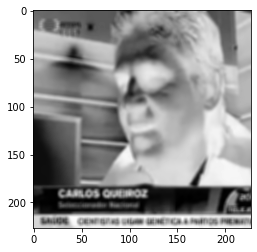

In [47]:
import cv2
##TODO: load in and display any image from the transformed test dataset

## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
# plt.imshow(w[filter_index][0], cmap='gray')


idx_img = 0
img = np.squeeze(test_images[idx_img].data.numpy())

# plt.imshow(img, cmap="gray")

filtered_img = cv2.filter2D(img, -1, w[filter_index][0])
plt.imshow(filtered_img, cmap="gray")


### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: The filter seems to blur out noise



---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!